In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# loading dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
x_train = x_train/255 
x_test  = x_test/255 

In [4]:
i = tf.keras.Input((28,28,1))
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(i)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='tanh', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = tf.keras.layers.Conv2DTranspose(32, (3, 3), activation='tanh', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
autoencoder = tf.keras.models.Model(i, x)

In [5]:
# model summary
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 7, 7, 32)         9248  

In [6]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [7]:
r= autoencoder.fit(
    x=x_train,
    y=x_train,
    epochs=25,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test, x_test),
)

Epoch 1/25
469/469 [==============================] - 7s 7ms/step - loss: 0.1390 - accuracy: 0.8070 - val_loss: 0.1144 - val_accuracy: 0.8100
Epoch 2/25
469/469 [==============================] - 3s 6ms/step - loss: 0.1139 - accuracy: 0.8110 - val_loss: 0.1123 - val_accuracy: 0.8111
Epoch 3/25
469/469 [==============================] - 3s 6ms/step - loss: 0.1123 - accuracy: 0.8115 - val_loss: 0.1111 - val_accuracy: 0.8112
Epoch 4/25
469/469 [==============================] - 3s 6ms/step - loss: 0.1114 - accuracy: 0.8118 - val_loss: 0.1107 - val_accuracy: 0.8097
Epoch 5/25
469/469 [==============================] - 3s 6ms/step - loss: 0.1108 - accuracy: 0.8119 - val_loss: 0.1101 - val_accuracy: 0.8116
Epoch 6/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1104 - accuracy: 0.8121 - val_loss: 0.1096 - val_accuracy: 0.8111
Epoch 7/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1101 - accuracy: 0.8121 - val_loss: 0.1096 - val_accuracy: 0.8105
Epoch 

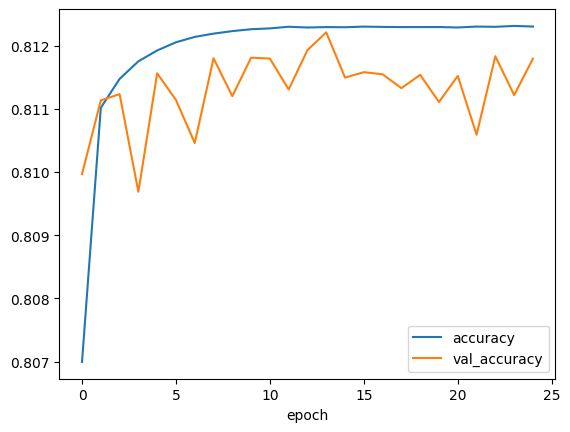

In [8]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epoch')
plt.legend()

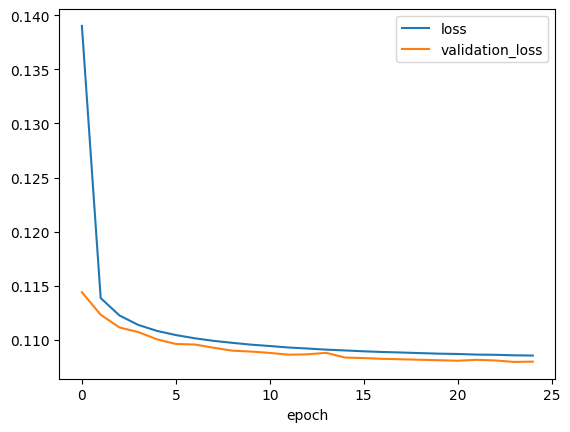

In [9]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='validation_loss')
plt.xlabel('epoch')
plt.legend()

In [10]:
def make_prediction(img, idx):
    img = np.expand_dims(x_test[idx], axis=-1)[np.newaxis, ...]
    pred = autoencoder.predict(img)
    return np.squeeze(pred)

In [58]:
def plot_img(idx):
    fig, axes = plt.subplots(1, 2, figsize=(3, 3))
    img = x_test[idx]
    prediction = make_prediction(img,idx)
    axes[0].imshow(prediction, cmap='gray')
    axes[1].imshow(img, cmap='gray')
    axes[0].set_title('generated')
    axes[1].set_title('original')
    axes[0].axis('off')
    axes[1].axis('off')

1/1 [==============================] - 0s 19ms/step


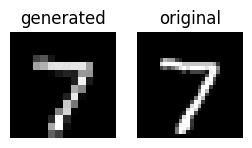

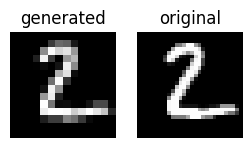

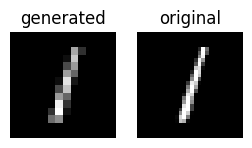

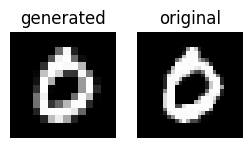

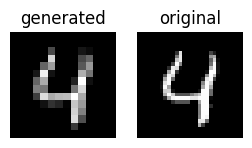

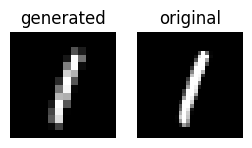

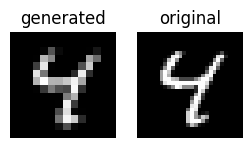

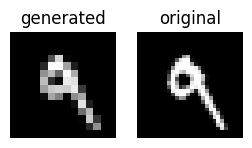

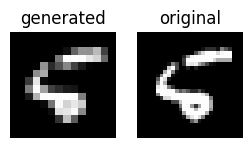

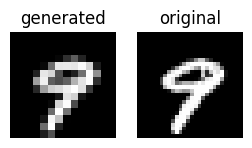

In [62]:
for i in range(10):
    plot_img(i)

In [14]:
# autoencoder.save("mnist_reconstruction_AE.h5")